In [3]:
pip install pytz

  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MSFT.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9382,2023-06-05,335.220001,338.559998,334.660004,335.940002,335.940002,21307100
9383,2023-06-06,335.329987,335.369995,332.170013,333.679993,333.679993,20396200
9384,2023-06-07,331.649994,334.489990,322.500000,323.380005,323.380005,40717100
9385,2023-06-08,323.940002,326.640015,323.350006,325.260010,325.260010,23277700


In [4]:
df=df[['Date','Close']]

In [5]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9382,2023-06-05,335.940002
9383,2023-06-06,333.679993
9384,2023-06-07,323.380005
9385,2023-06-08,325.260010


In [6]:
import datetime

In [7]:
def str_to_datetime(s):
    split=s.split('-')
    year, month, day=int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
datetime_object = str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [8]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9382,2023-06-05,335.940002
9383,2023-06-06,333.679993
9384,2023-06-07,323.380005
9385,2023-06-08,325.260010


In [9]:
df['Date']=df['Date'].apply(str_to_datetime)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4160\1499576352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


In [10]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9382   2023-06-05
9383   2023-06-06
9384   2023-06-07
9385   2023-06-08
9386   2023-06-09
Name: Date, Length: 9387, dtype: datetime64[ns]

In [11]:
df.index= df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-06-05,335.940002
2023-06-06,333.679993
2023-06-07,323.380005


In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt

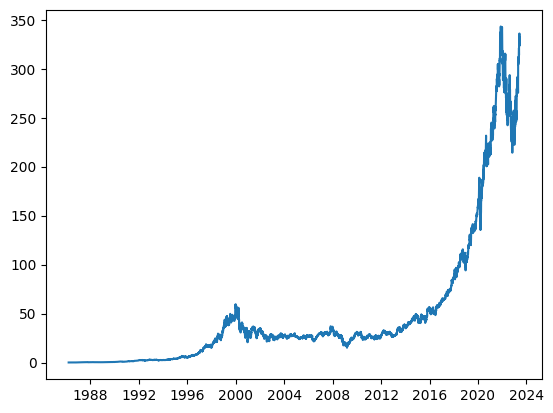

In [16]:
plt.plot(df.index,df['Close'])

In [17]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
  
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
    
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True
    
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
  
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df


windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2023-06-09', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
552,2023-06-05,328.390015,332.579987,335.399994,335.940002
553,2023-06-06,332.579987,335.399994,335.940002,333.679993
554,2023-06-07,335.399994,335.940002,333.679993,323.380005
555,2023-06-08,335.940002,333.679993,323.380005,325.260010


In [18]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np=windowed_dataframe.to_numpy()
    dates=df_as_np[:,0]
    middle_matrix = df_as_np[:,1:-1]
    X= middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X ,y =windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((557,), (557, 3, 1), (557,))

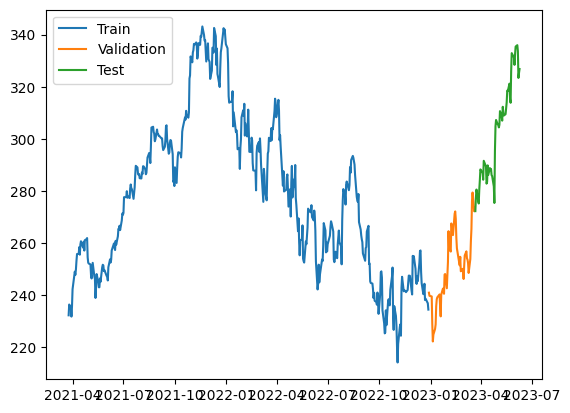

In [19]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
14/14 [==============================] - 8s 105ms/step - loss: 77725.6250 - mean_absolute_error: 277.1642 - val_loss: 62719.3320 - val_mean_absolute_error: 250.0663
Epoch 2/100
14/14 [==============================] - 0s 15ms/step - loss: 77194.6172 - mean_absolute_error: 276.2055 - val_loss: 62175.0195 - val_mean_absolute_error: 248.9753
Epoch 3/100
14/14 [==============================] - 0s 16ms/step - loss: 76415.5625 - mean_absolute_error: 274.7908 - val_loss: 61209.7930 - val_mean_absolute_error: 247.0296
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 75073.9531 - mean_absolute_error: 272.3349 - val_loss: 59667.4805 - val_mean_absolute_error: 243.8877
Epoch 5/100
14/14 [==============================] - 0s 16ms/step - loss: 73067.5938 - mean_absolute_error: 268.6305 - val_loss: 57555.1445 - val_mean_absolute_error: 239.5173
Epoch 6/100
14/14 [==============================] - 0s 18ms/step - loss: 70089.4141 - mean_absolute_error: 263.0105 - 

14/14 [==============================] - 1s 5ms/step


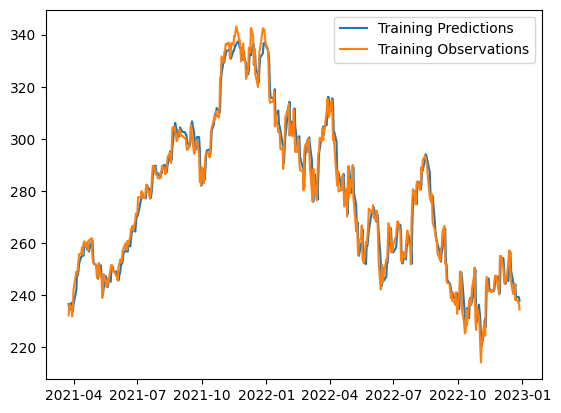

In [24]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 5ms/step


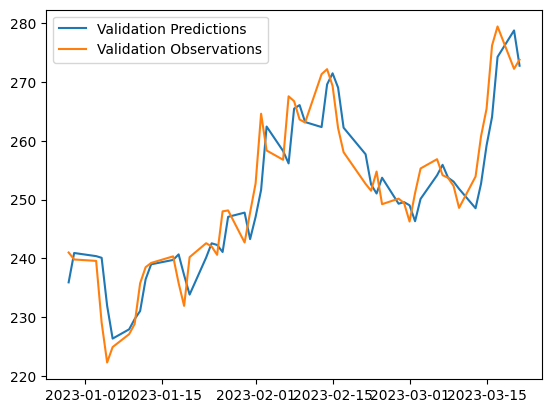

In [25]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 5ms/step


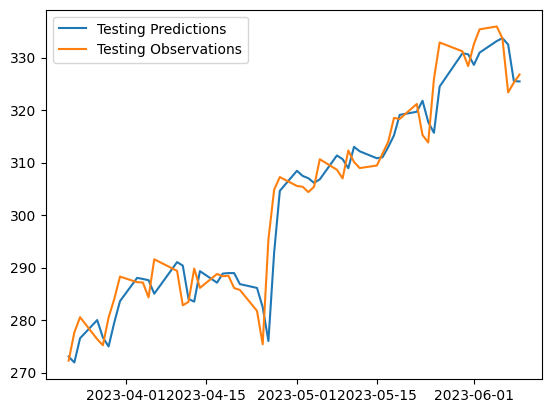

In [26]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

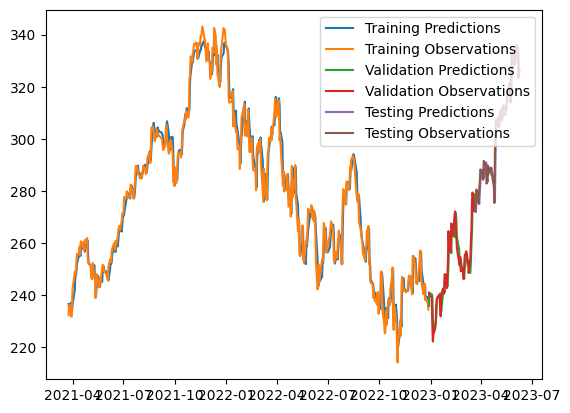

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [31]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])
for target_date in recursive_dates:
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 40ms/step


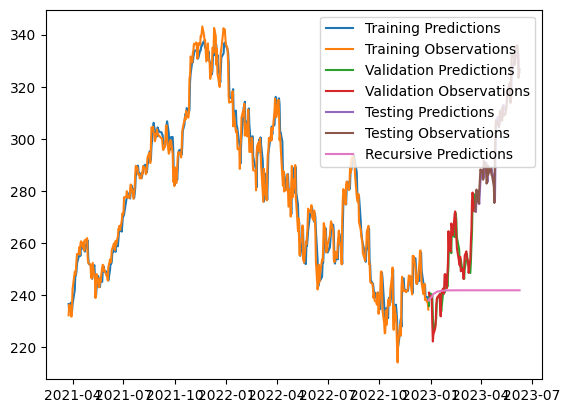

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])